height: 4032, width: 3024, channels: 3 


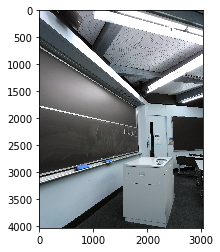

In [5]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

IMAGE_NAME = "./demo/1.jpg"

# ここに透視変換を記述

# img = cv2.imread("./dev_images2/IMG_3207.jpg")
# img = cv2.imread("./data/lena.jpg")
# img = cv2.rotate(cv2.imread(IMAGE_NAME), cv2.ROTATE_90_COUNTERCLOCKWISE)
img = cv2.imread(IMAGE_NAME)
plt.imshow(img)

# 1. 画像の縦と横の長さを確認
height, width, channels = img.shape[:3]
print("height: %d, width: %d, channels: %d " % (height, width, channels)) # data/lenaの場合、height: 168, width: 300, channels: 3 

height: 1250, width: 650, channels: 3 


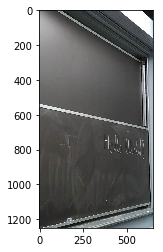

In [12]:
# 2. 画像内のスライドの４つ角の位置を見つける
# サンプル1の切り出し、保存
# img[top : bottom, left : right]
resize_img = img[1500 : 2750, 1200: 1850]
plt.imshow(resize_img)

# cv2.imwrite('./dev_images2/IMG_3207_resize.jpg', img1)
resize_height, resize_width, resize_channels = resize_img.shape[:3]

print("height: %d, width: %d, channels: %d " % (resize_height, resize_width, resize_channels))

True

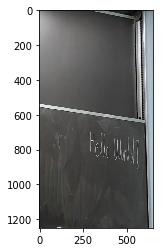

In [20]:
# 3. そこに合わせて透視変換を行う

# list = np.float32(左上,左下, 右下, 右上)
# listの元々の座標から目的の座標のどちらも必要
# 今回の場合は、元々の目標が画像サイズいっぱいなので、目的の設定は簡単

# 
list_srcs = np.float32([[0,0], [0,resize_height], [resize_width, resize_height-200], [resize_width, 300]])
# 目的値
list_dsts = np.float32([[0,0], [0,resize_height], [resize_width, resize_height], [resize_width, 0]])

perspective_matrix = cv2.getPerspectiveTransform(list_srcs, list_dsts)

dst_image = cv2.warpPerspective(resize_img, perspective_matrix, (resize_width, resize_height))

plt.imshow(dst_image)

cv2.imwrite('./demo/1_dst.jpg', dst_image)
